In [46]:
import pandas as pd
from scipy import stats
import numpy as np
df = pd.read_csv("/content/drive/MyDrive/Аналитик_обучение/customer_demographics_задание5.csv")

In [54]:

# Приведение age_range к числовым категориям
age_mapping= {
    "26-35": 1,
    "36-45": 2,
    "46-55": 3,
    "56-65": 4,
    "70+": 5
}
df['age_range_numeric'] = df['age_range'].map(age_mapping)

# Очистка столбца family_size: удаление строковых значений, таких как '5+'
df['family_size'] = df['family_size'].replace({'5+': 5}).astype(int)

# Удаление строк с пропущенными значениями в столбцах family_size и age_range_numeric
df_cleaned = df.dropna(subset=['family_size', 'age_range_numeric'])

# Столбцы для анализа
columns_to_analyze = ['family_size', 'age_range_numeric']

# Анализ каждого столбца
for column in columns_to_analyze:
    print(f"\nАнализ столбца: {column}")
    data = df_cleaned[column]

    # Тест Шапиро-Уилка
    shapiro_stat, shapiro_p = stats.shapiro(data)
    print(f"Тест Шапиро-Уилка: статистика = {shapiro_stat:.4f}, p-value = {shapiro_p:.4f}")
    if shapiro_p > 0.05:
        print("Гипотеза о нормальном распределении НЕ отвергается (данные могут быть нормально распределены).")
    else:
        print("Гипотеза о нормальном распределении отвергается (данные не нормально распределены).")

    # Критерий согласия Пирсона (χ²)
    observed_freq, bins = np.histogram(data, bins='auto')
    bin_centers = (bins[:-1] + bins[1:]) / 2  # Центры интервалов
    expected_freq = len(data) * stats.norm.pdf(bin_centers, loc=np.mean(data), scale=np.std(data))

    # Нормализация ожидаемых частот
    expected_freq = expected_freq * (sum(observed_freq) / sum(expected_freq))

    # Критерий согласия Пирсона
    chi2_stat, chi2_p = stats.chisquare(f_obs=observed_freq, f_exp=expected_freq)
    print(f"Критерий согласия Пирсона: статистика = {chi2_stat:.3f}, p-value = {chi2_p:.3f}")

    # Асимметрия
    skewness = stats.skew(data)
    print(f"Асимметрия: {skewness:.4f}")

    # Эксцесс
    kurtosis = stats.kurtosis(data)
    print(f"Эксцесс: {kurtosis:.4f}")

    # Среднее квадратичное отклонение (σ)
    std_dev = np.std(data)
    print(f"Среднее квадратичное отклонение (σ): {std_dev:.4f}")


Анализ столбца: family_size
Тест Шапиро-Уилка: статистика = 0.8218, p-value = 0.0000
Гипотеза о нормальном распределении отвергается (данные не нормально распределены).
Критерий согласия Пирсона: статистика = 1232.495, p-value = 0.000
Асимметрия: 1.0035
Эксцесс: 0.1786
Среднее квадратичное отклонение (σ): 1.1964

Анализ столбца: age_range_numeric
Тест Шапиро-Уилка: статистика = 0.8486, p-value = 0.0000
Гипотеза о нормальном распределении отвергается (данные не нормально распределены).
Критерий согласия Пирсона: статистика = 2860.947, p-value = 0.000
Асимметрия: 0.6084
Эксцесс: 0.1122
Среднее квадратичное отклонение (σ): 1.1259


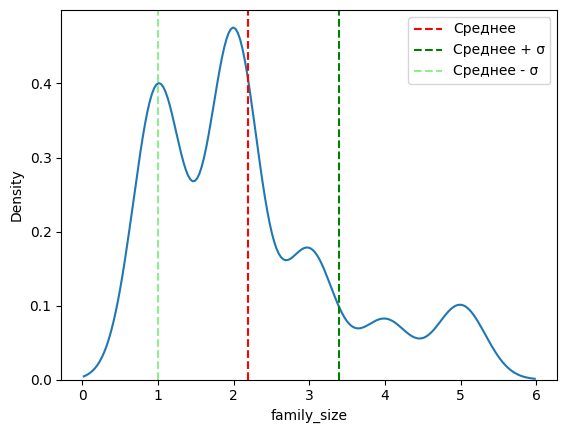

In [74]:
import seaborn as sns
# График плотности для family_size
sns.kdeplot(data)
plt.axvline(x=np.mean(data), color='red', linestyle='--', label='Среднее')
plt.axvline(x=np.mean(data) + np.std(data), color='green', linestyle='--', label='Среднее + σ')
plt.axvline(x=np.mean(data) - np.std(data), color='lightgreen', linestyle='--', label='Среднее - σ')
plt.legend()
plt.show()

<Axes: ylabel='Density'>

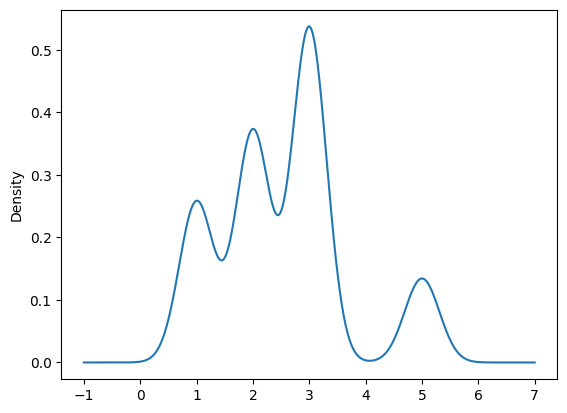

In [63]:
df['age_range_numeric'].plot.density()

In [75]:
df

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket,age_range_numeric
0,1,70+,Married,0,2,NaN,4,5.0
1,6,46-55,Married,0,2,NaN,5,3.0
2,7,26-35,NaN,0,3,1,3,1.0
3,8,26-35,NaN,0,4,2,6,1.0
4,10,46-55,Single,0,1,NaN,5,3.0
...,...,...,...,...,...,...,...,...
755,1577,36-45,NaN,0,2,NaN,5,2.0
756,1578,46-55,Married,0,3,1,6,3.0
757,1579,46-55,NaN,0,1,NaN,4,3.0
758,1580,26-35,NaN,0,2,NaN,5,1.0
